In [13]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(".")
import network_model as netwp
from multiprocessing import Pool
import pandas as pd
import seaborn as sns

group = ['Drivers','Loaders','Office']

def run_sim(Network, kappa, pvrange, Nrepeats, Ndays, SAR):
    pvlist = []
    glist = []
    EpidemicSize = np.zeros(len(pvrange)*3*Nrepeats)
    j = 0
    for pv in pvrange:
        print(j)
        pvlist += 3*Nrepeats*[pv]
        for k in np.arange(Nrepeats):
            Network.run_simulation(Ndays, kappa, 1, SAR, pv)
            for n in np.arange(3):
                glist.append(group[n])
                EpidemicSize[3*Nrepeats*j + 3*k + n] = Network.states[-1,4,n] 
        j += 1
    return pd.DataFrame({'Pair Infection Probs': np.array(pvlist), 'Group': np.array(glist),\
                         'Epidemic Size': EpidemicSize})

In [14]:
N = [50,20,10]
Network = netwp.Workplace_Network(N, 0.9, 0.5, fixed_pairings = False)
Network.run_simulation(200, 5, 1, 0.1, 0.2)


In [15]:
#plt.plot(Network.states[:,0,0] + Network.states[:,0,1] + Network.states[:,0,2])
p = 0.05   #SAR (lancet)
Nrepeats = 1000
Ndays = 200

args = []
pvrange = 0.1*np.arange(6)
for i in np.arange(5):
    args.append((Network, 3*i, pvrange, Nrepeats, Ndays, p))

with Pool(6) as p:
    output = p.starmap(run_sim, args)

0
0
0
0
0


Process ForkPoolWorker-23:
Process ForkPoolWorker-21:
Process ForkPoolWorker-19:
Process ForkPoolWorker-22:
Process ForkPoolWorker-24:
Process ForkPoolWorker-20:


KeyboardInterrupt: 

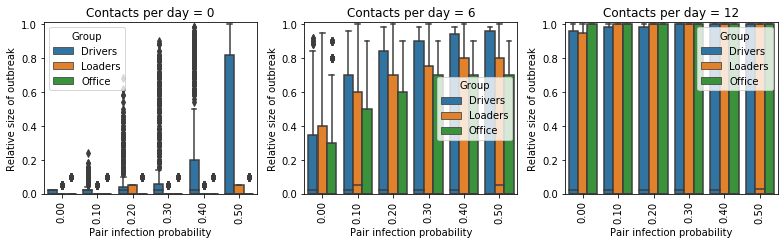

In [21]:
fig,ax = plt.subplots(1,3,figsize=(11,3.5))
for i in np.arange(3):
    df = output[2*i]
    Nh = np.zeros(len(df))
    for j in np.arange(3):
        Nh[df['Group']==group[j]] += N[j]
    df['Epi Size Norm'] = df['Epidemic Size']/Nh
    sns.boxplot(data=df, x='Pair Infection Probs',y='Epi Size Norm', hue='Group', ax=ax[i])
    ax[i].set_title('Contacts per day = %d'%(6*i))
    ax[i].set_xlabel('Pair infection probability')
    ax[i].set_ylabel('Relative size of outbreak')
    pvlabels = []
    for pv in pvrange:
        pvlabels.append('%.2f'%pv)
    ax[i].set_xticklabels(pvlabels,rotation=90)
    ax[i].set_ylim((0,1.01))
fig.tight_layout()
fig.savefig('Mixed_pairs.png')

In [8]:
Network = netwp.Workplace_Network(N, 0.9, 0.5, fixed_pairings = True)

In [9]:
#plt.plot(Network.states[:,0,0] + Network.states[:,0,1] + Network.states[:,0,2])
p = 0.05   #SAR (lancet)
Nrepeats = 1000
Ndays = 200
EpidemicSize = np.zeros((6,6))
EpidemicSizeStd = np.zeros((6,6))

args = []
pvrange = 0.05*np.arange(6)
for i in np.arange(6):
    args.append((Network, 3*i, pvrange, Nrepeats, Ndays, p))

with Pool(6) as p:
    output2 = p.starmap(run_sim, args)
    

0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
3
2
2
3
2
4
3
4
3
3
3
5
5
4
4
4
4
5
5
5
5


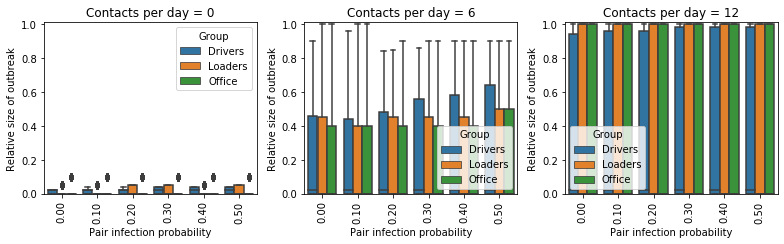

In [20]:
fig,ax = plt.subplots(1,3,figsize=(11,3.5))
for i in np.arange(3):
    df = output2[2*i]
    Nh = np.zeros(len(df))
    for j in np.arange(3):
        Nh[df['Group']==group[j]] += N[j]
    df['Epi Size Norm'] = df['Epidemic Size']/Nh
    sns.boxplot(data=df, x='Pair Infection Probs',y='Epi Size Norm', hue='Group', ax=ax[i])
    ax[i].set_title('Contacts per day = %d'%(6*i))
    ax[i].set_xlabel('Pair infection probability')
    ax[i].set_ylabel('Relative size of outbreak')
    pvlabels = []
    for pv in pvrange:
        pvlabels.append('%.2f'%pv)
    ax[i].set_xticklabels(pvlabels,rotation=90)
    ax[i].set_ylim((0,1.01))
fig.tight_layout()
fig.savefig('Fixed_pairs.png')